# Time Series Analysis Using Pandas

Like with other ML/Stats topics when using Python, Pandas is the main vehicle that is used in order to analyse timeseries.

Here I want to outline some basic ways in which Pandas is used before working on more statistical analyses.

I already know the general ways to use pandas, so these notes will just be condensed ways in which I didn't know you could use Pandas before.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You can generate a range of dates in a similar way to how you might create a range of numbers with numpy

In [2]:
idx = pd.date_range('2019-01-01', periods=12, freq='MS')

idx

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

This means that if you have some dataframe, you can use this or any other timeseries in order to index the data by datetimes

In [3]:
# Create some random data
data = pd.np.random.randn(12,3)
cols = ['A','B', 'C']
df = pd.DataFrame(data,idx,cols)

df

,A,B,C
2019-01-01,0.559426,-1.403306,2.831348
2019-02-01,-1.382413,-0.389692,0.476819
2019-03-01,-0.215662,-2.129868,0.145650
2019-04-01,-2.014553,0.390323,1.044413
2019-05-01,-0.548672,0.110123,1.242255
2019-06-01,0.053374,0.695472,-1.379627
2019-07-01,-0.396171,-0.348112,-0.725727
2019-08-01,0.350513,0.493611,-1.052566
2019-09-01,-1.477533,-2.011431,-0.678495
2019-10-01,1.910844,0.351861,-0.023699


We can check the index of our dataframe as well.

In [4]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

You can even set the frequency manually, *pay special attention to this because its done a lot*.

For a table of possible offset aliases, you should check [this table](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [5]:
df.index.freq = 'MS'  # This shouldnt change anything since the frequency is already set

df.index.freq

<MonthBegin>

You can also shift the data using the dataframes `shift` method.

This is quite useful if you ever need to quickly do calculation similar to lag/lead in SQL.

In [6]:
df.shift(1).head(3)

,A,B,C
2019-01-01,NaN,NaN,NaN
2019-02-01,0.559426,-1.403306,2.831348
2019-03-01,-1.382413,-0.389692,0.476819


You can also do analyses using `rolling` or `expanding` that does some kind of a calculation based on windows that move along the data or expand over entries of the data. Quite handy so that you don't need to do these kinds of things on your own.

In [7]:
# Import starbucks data:
df = pd.read_csv('./dat/starbucks.csv', index_col='Date', parse_dates=True)

df.head(3)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340


Note how in the cell above I can use the `index_col` and `parse_dates` arguments in order to parse the dates into the index and automatically interpret them as a datetime timeseries.

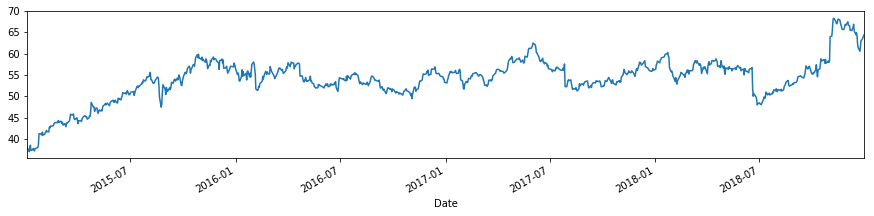

In [8]:
df.Close.plot(figsize=(15,3));

We can see this as an example as a moving average 

In [9]:
df_windows = pd.DataFrame([df.Close.rolling(30).mean(), df.Close.expanding().mean()]).T
df_windows.columns = ["Rolling", "Expanding"]

df_windows.head(3)

,Rolling,Expanding
Date,,
2015-01-02,NaN,38.006100
2015-01-05,NaN,37.642100
2015-01-06,NaN,37.419667


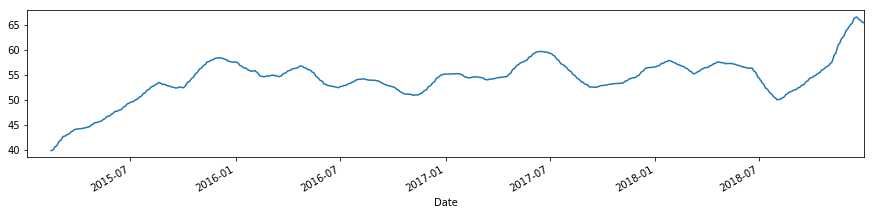

In [10]:
df_windows.Rolling.plot(figsize=(15,3));

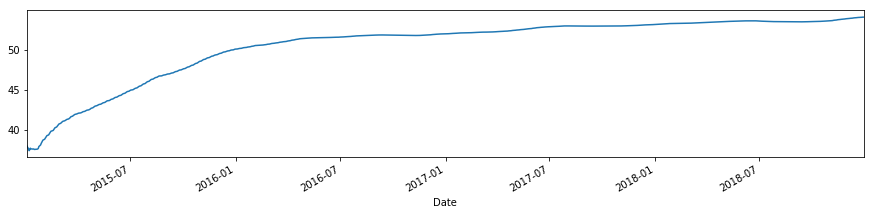

In [11]:
df_windows.Expanding.plot(figsize=(15,3));

This concludes the basic idea of using pandas for TSA.